## Exercise 7: K-means Clustering, Principal Component Analysis (PCA), UMAP,Kernel Density Estimation (deadline: noon, 16 April 2024)
## Note: Please complete the tasks in this file, and rename the file as "Exercise_07_FirstName_LastName.ipynb"
## Total points: 10

---

#### What to expect from the exercise
In this session, you will dive into the world of unsupervised learning with a focus on K-means Clustering, PCD, UMAP, and Kernel Density Estimation. The ability to uncover patterns and reduce the dimensionality of datasets without prior labeling is a powerful tool in data science, offering insights into data structuring and simplification for further analysis.

---

### Technical Setup
Before you start, ensure you have the necessary packages installed. For exmaple, run the following command to install scikit-learn:

```python
!pip install scikit-learn
```


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

%matplotlib inline

### K-means Clustering (2 points)

First, load a sample dataset and perform basic EDA.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Task 1.1 (1 point)** Apply K-means clustering on the dataset with k=3 and visualize the results. Please also show the clusters in the graph.  
Hint: 1) sklearn.cluster.KMeans. 2) An example of the visualization method could be a scatter plot with x=df[:,0], y=df[:,1], and color=clustering result (3 colors for k=3, 4 colors for k=4)

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

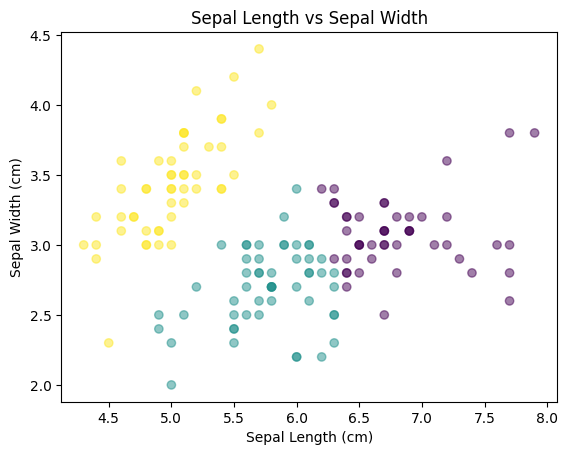

In [3]:
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

#scatter plot of sepal length vs sepal width
X = df[["sepal length (cm)", "sepal width (cm)",]]
model.fit(X)

plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c = model.labels_, cmap = "viridis", alpha = 0.5)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Sepal Length vs Sepal Width")


**Task 1.2 (1 point)** Try clustering with different k values (for example k=2 to k=5), and also visualize the result, and which k value do you think is a good choice?

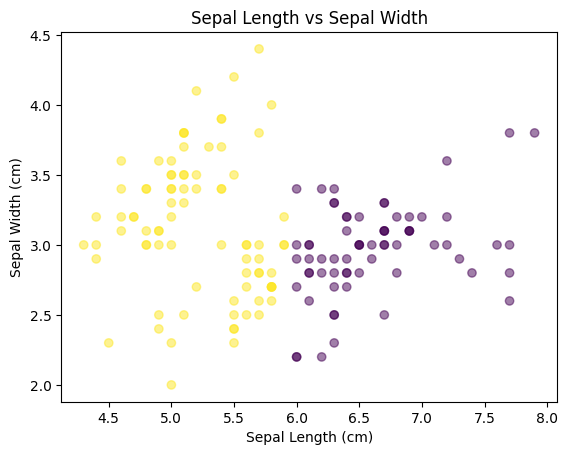

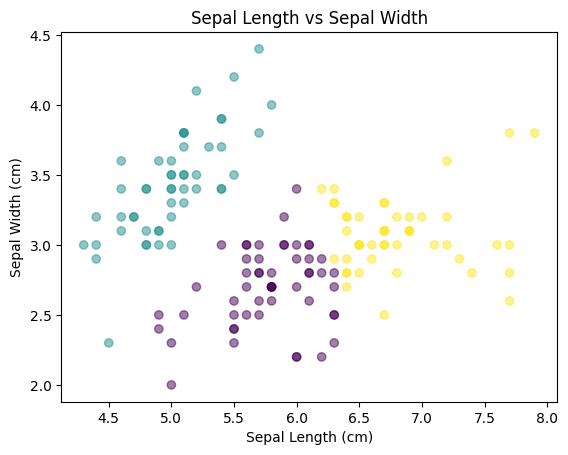

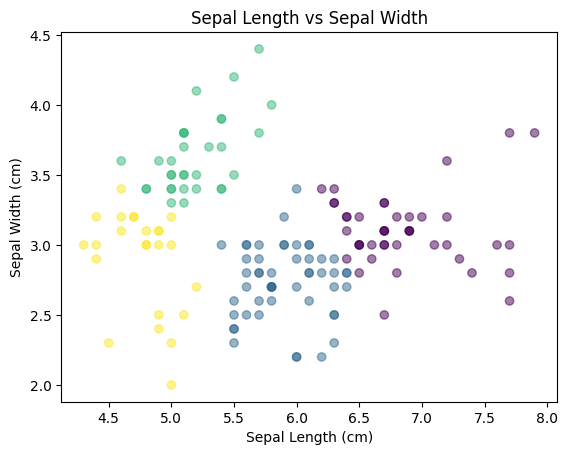

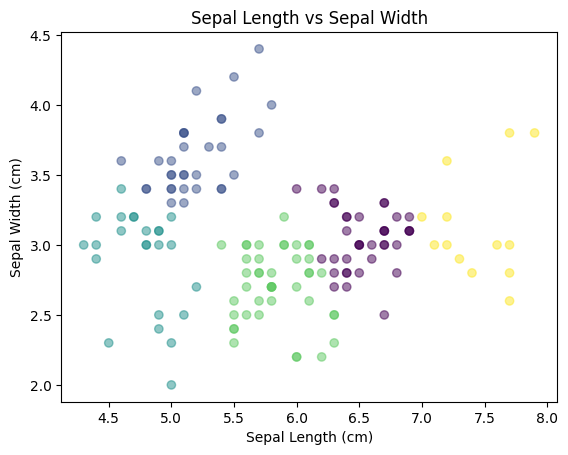

In [4]:
for i in range(2, 6):
    model = KMeans(n_clusters=i)

    #scatter plot of sepal length vs sepal width
    X = df[["sepal length (cm)", "sepal width (cm)",]]
    model.fit(X)

    plt.figure()
    plt.scatter(df["sepal length (cm)"], df["sepal width (cm)"], c = model.labels_, cmap = "viridis", alpha = 0.5)
    plt.xlabel("Sepal Length (cm)")
    plt.ylabel("Sepal Width (cm)")
    plt.title("Sepal Length vs Sepal Width")

I would thinkt that k = 4 is the best choice

### PCA (3 points)

In this session, the gaol is to perform PCA on the same iris dataset to reduce its dimensionality.

**Task 2.1 (1 point)** Perform PCA on the dataset to reduce its dimensionality to 2 components.. Hint: sklearn.decomposition.PCA is helpful

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
pca = pca.fit_transform(X)


**Task 2.2 (1 point)** Visualize the dataset in a 2D PCA-reduced space.

Text(0.5, 1.0, 'PCA of Iris Dataset')

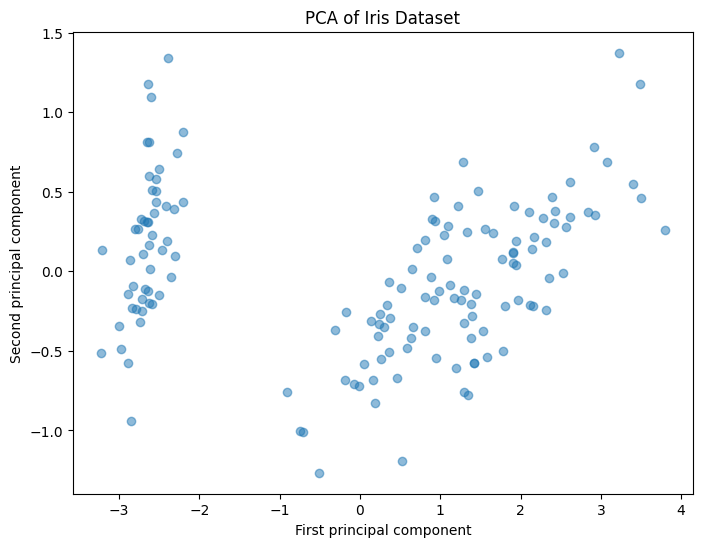

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(pca[:, 0], pca[:, 1], alpha=0.5)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA of Iris Dataset")

**Task 2.3 (1 point)** Interpret the significance of the first two or three principal components.

### Kernel Density Estimation (3 points)

Let us randomly generate some sample points

In [7]:
def make_data(N, f=0.3, rseed=1):
    x = np.random.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

Let us plot a histogram of the sampled values

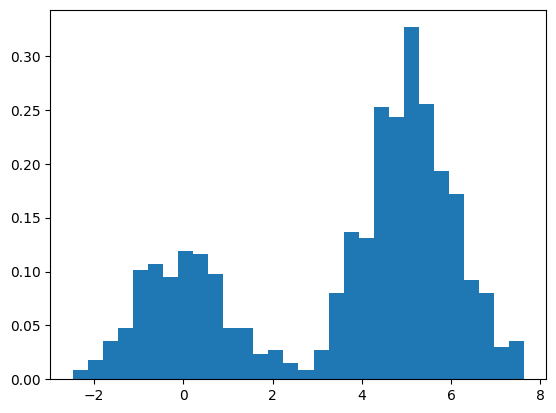

In [8]:
hist = plt.hist(x, bins=30, density=True, stacked=True)

 Let us confirm pdf is 1.0

In [9]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

The choice of bin size and location can lead to representations that have qualitatively different features

In [10]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

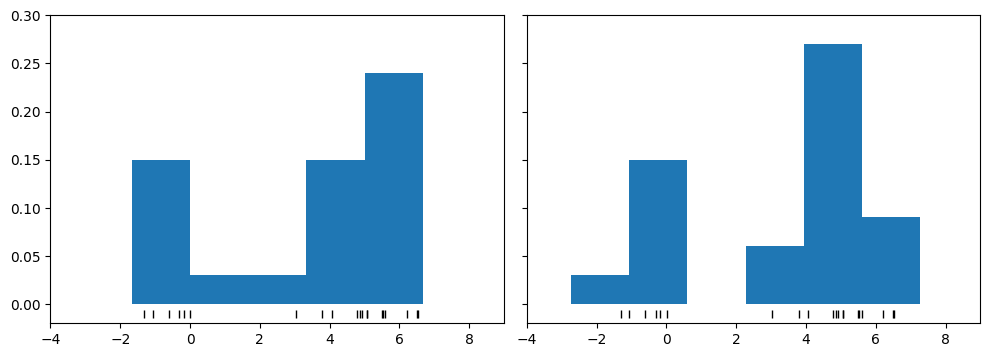

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       sharex=True, sharey=True,
                       subplot_kw={'xlim':(-4, 9),
                                   'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, density=True, stacked=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k',
               markeredgewidth=1)

So rather than using a histogram, let us fit a normal at each of the sampled points

(-4.0, 8.0, -0.2, 5.0)

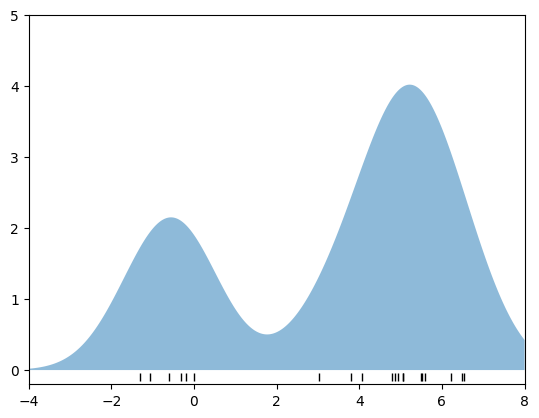

In [12]:
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5])

We can do the same using python libraries

In [13]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
def fit_kde(bandwidth=2.0):
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(x[:, None])

    # score_samples returns the log of the probability density
    logprob = kde.score_samples(x_d[:, None])

    plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
    plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    plt.ylim(-0.02, 0.22)
    plt.show()

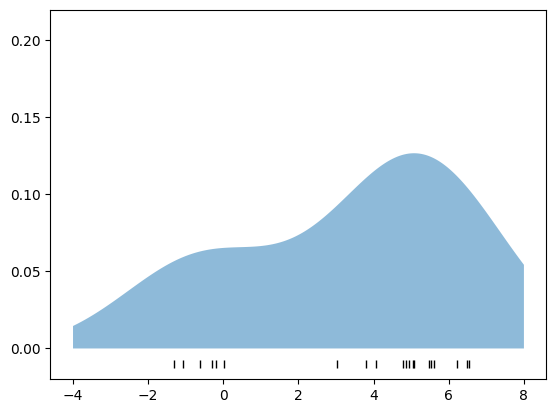

In [14]:
fit_kde()

**Task 3.1 (1 point)** The `bandwidth` is an important hyper-parameter for the kde. Try running the function above with different values of bandwidth ranging from [0,2] 

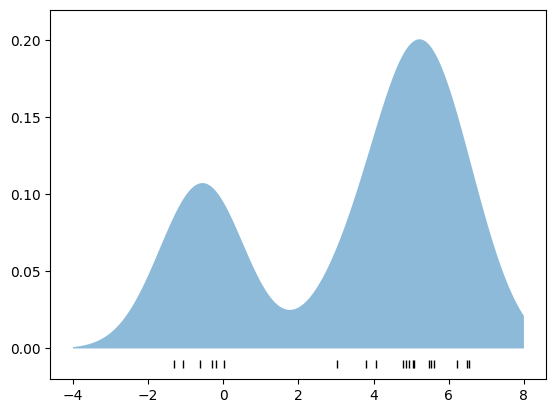

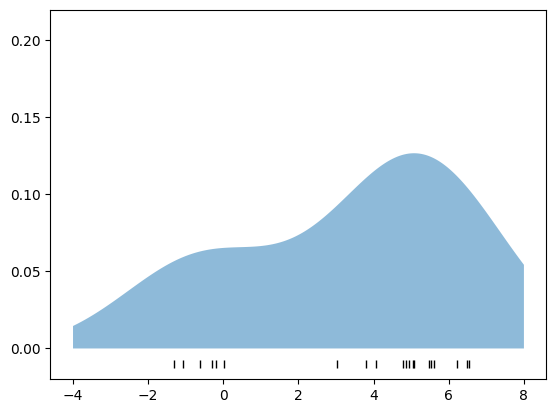

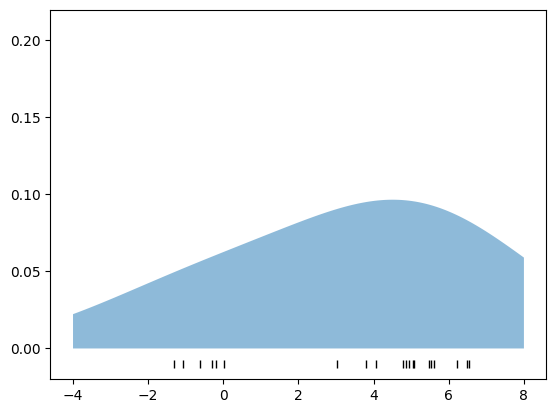

In [15]:
for i in range(1, 4): #bandwidth = 0 results in an error so i did [1,3]
    fit_kde(i)

Let us try to find the best bandwidth using ***GridSearch*** and Idea of Cross validation
You will find [this](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) useful

***Task 3.2 (1 point)*** Use GridSearchCV and LeaveOneOut Cross validation to find the best bandwidth

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x[:, None]);

#return the best bandwidth
grid.best_params_

{'bandwidth': 0.6428073117284322}

***Task 3.3 (1 point)*** Fit the KDE based on the best `bandwidth` value learnt

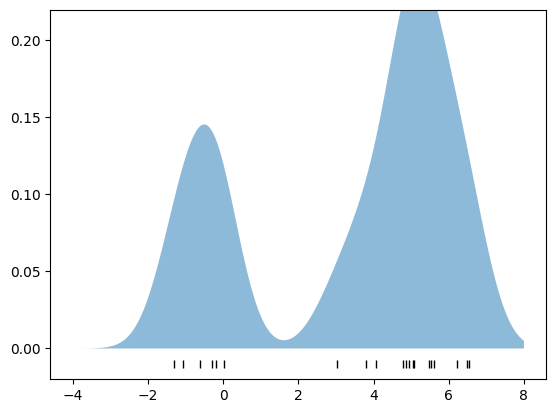

In [17]:
fit_kde(bandwidth=grid.best_params_['bandwidth'])

### UMAP (2 points)

UMAP is a dimensionality reduction technique standing for Uniform Manifold Approximation and Projection for Dimension Reduction. We will use its implementation in python thanks to umap library, https://umap-learn.readthedocs.io/en/latest/index.html

In [18]:
#pip install umap-learn
import umap 

We want to usa UMAP to reduce the dimensionality of the digit dataset tat is already present inside sklearn. 

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

We can also plot the images of the dataset to inpect them visually. As you can see these are quite low resolution images – for the most part they are recognisable as digits, but there are a number of cases that are sufficiently blurred as to be questionable even for a human to guess at. 

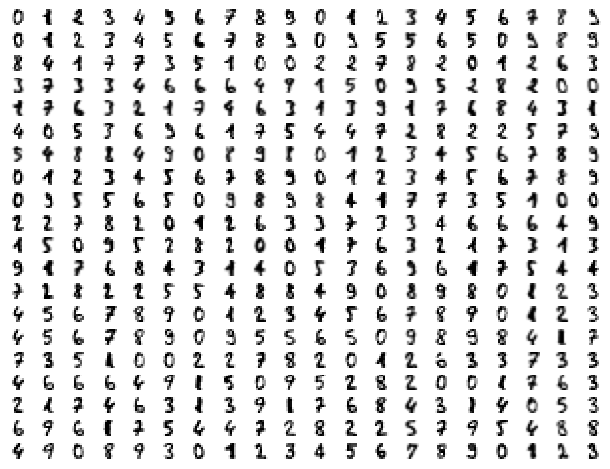

In [20]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)


The digits are 8x8 so each image can be unfolded into a 64 element long vector of grayscale values. It is these 64 dimensional vectors that we wish to analyse: how much of the digits structure can we discern? At least in principle 64 dimensions is overkill for this task, and we would reasonably expect that there should be some smaller number of “latent” features that would be sufficient to describe the data reasonably well. We can try to have a look at a scatterplot matrix, but this approach is not suitable. (sns.pairplot takes some time to run)

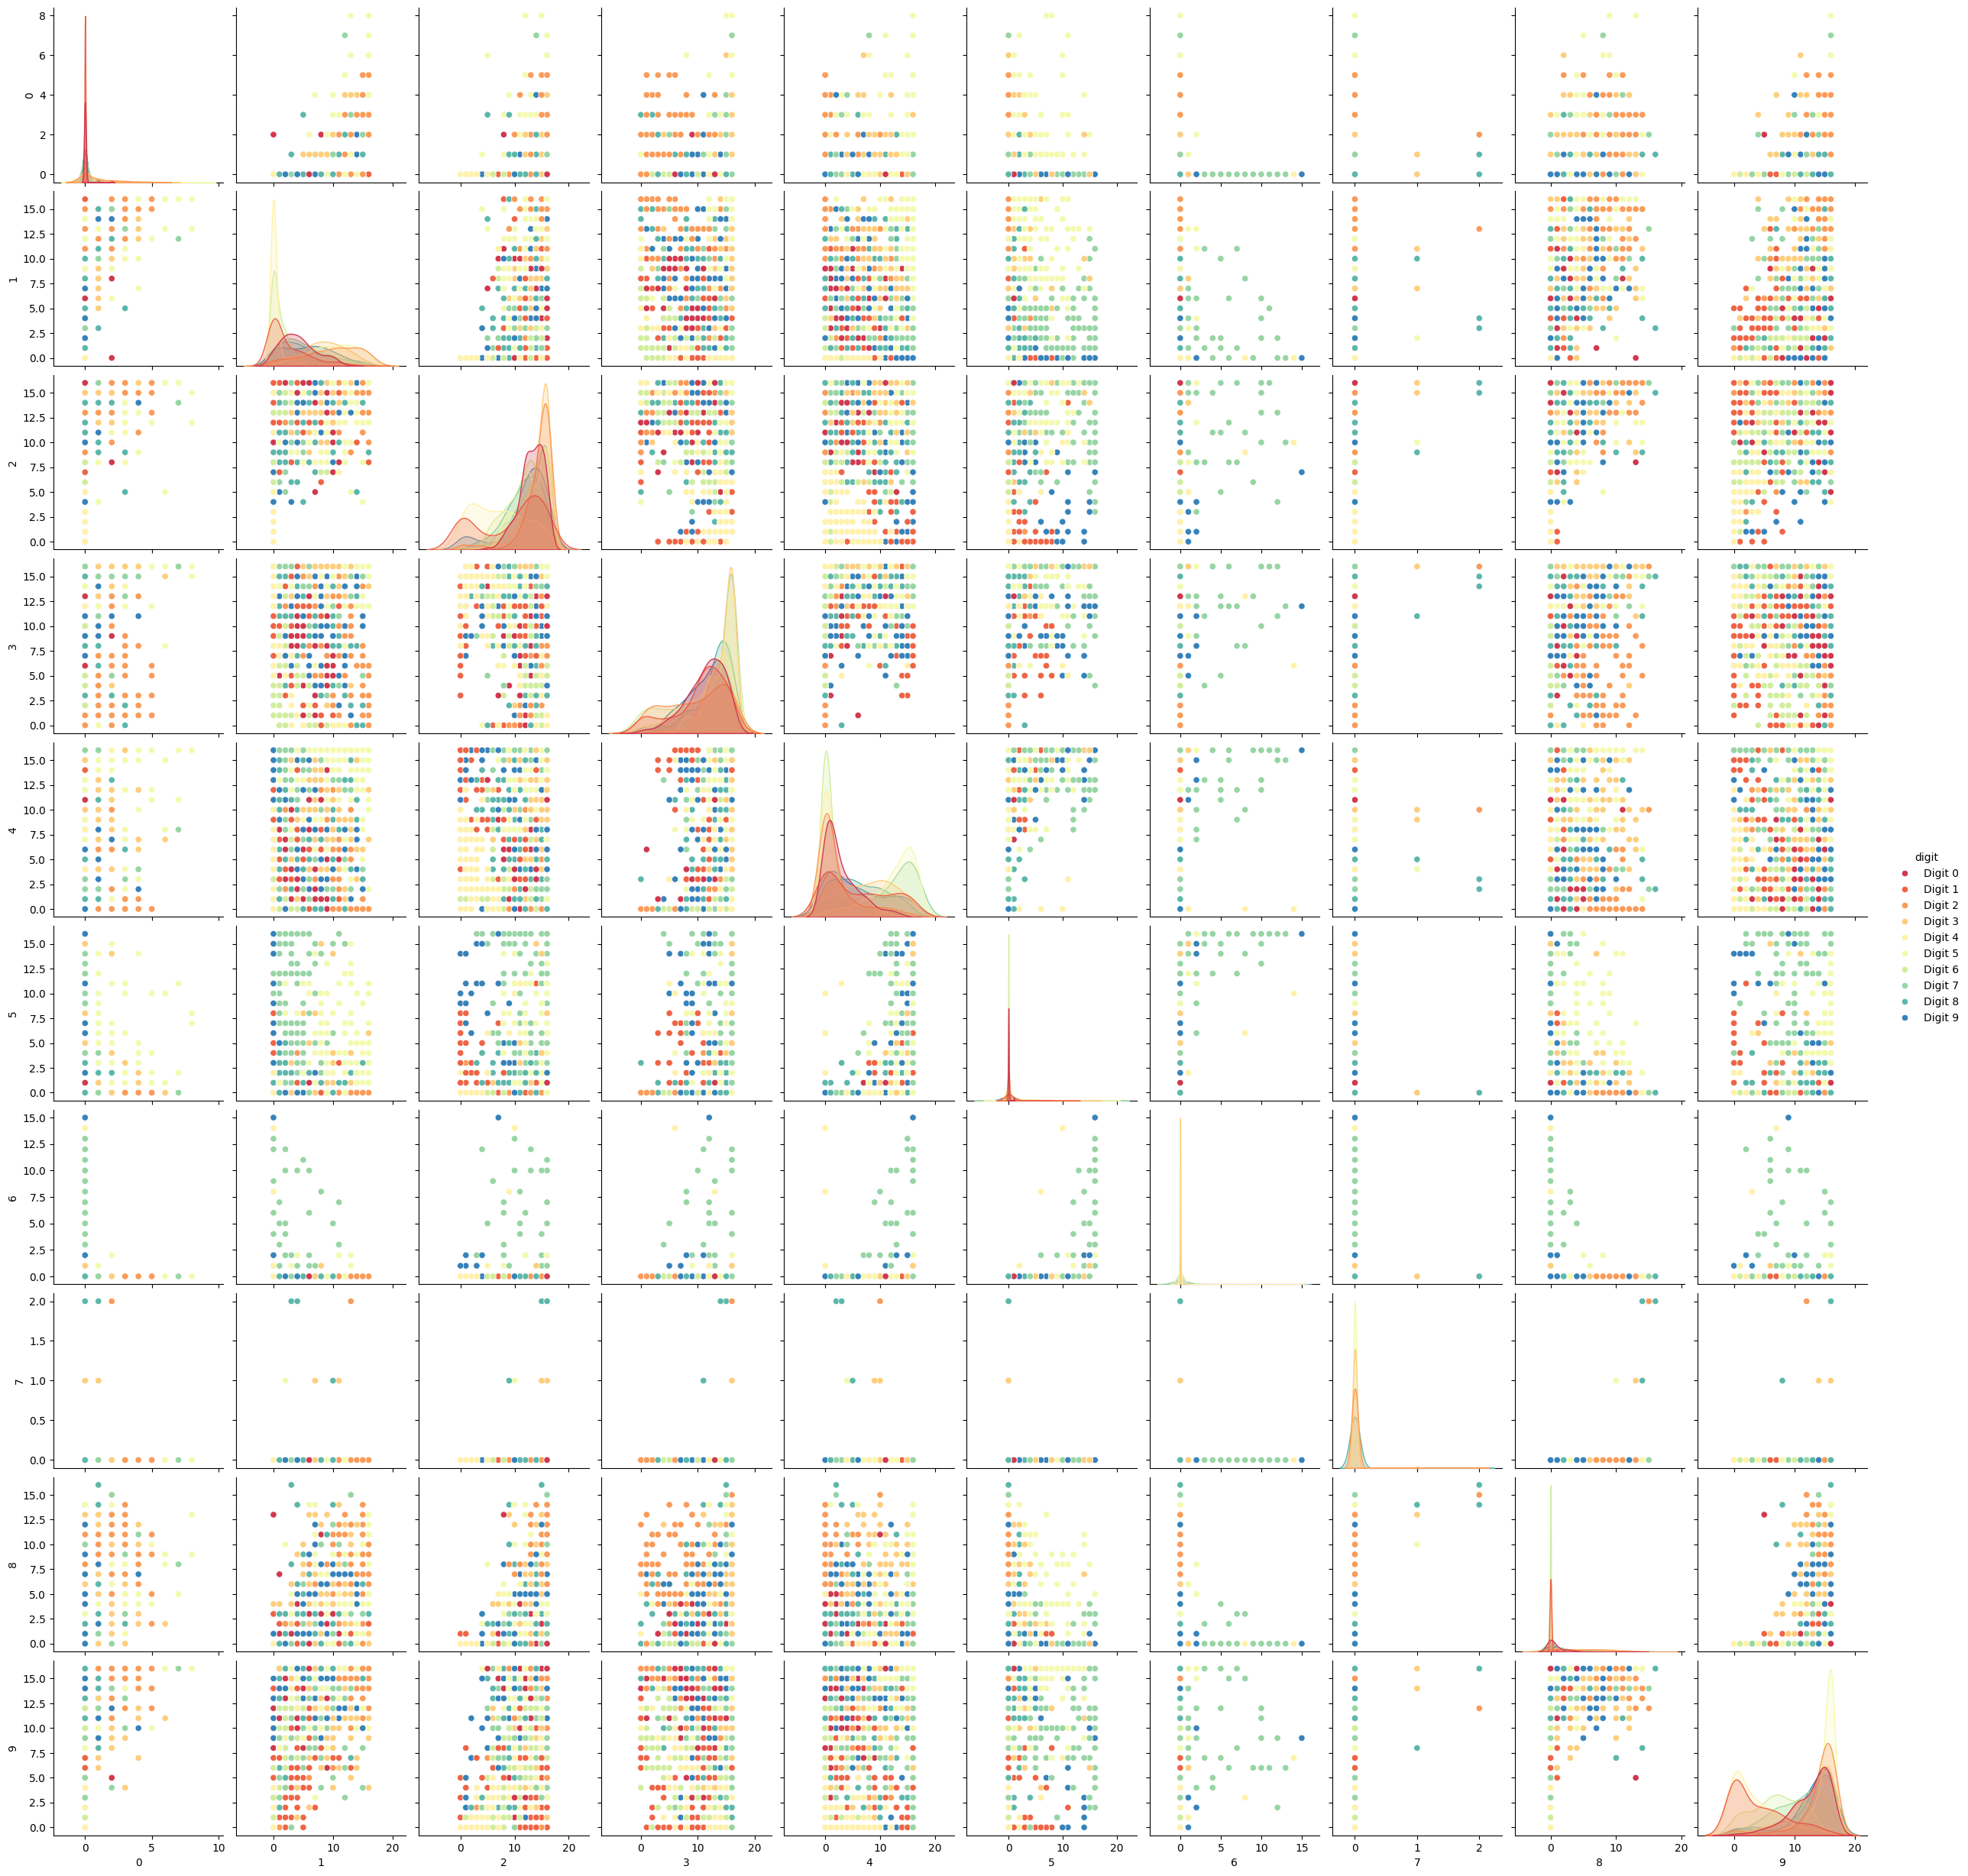

In [21]:
digits_df = pd.DataFrame(digits.data[:,1:11])
digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
sns.pairplot(digits_df, hue='digit', palette='Spectral');
plt.show()

***Task 4.1 (1 point)*** Initialize the UMAP calculator and fit the data to a 2 dimensional space. Show the original shape of the data and the shape after the transformation. 

In [ ]:
# Create a UMAP model
umap_model = umap.UMAP(n_neighbors=4, min_dist=0.3, metric='correlation')
#dissplay
umap_model.fit(digits.data)

***Task 4.2 (1 point)*** Plot the UMAP projection of the Digits database. 